In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [2]:
df=pd.read_csv("tmdb_5000_movies.csv")
print(df.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [42]:
# integer based indexing
X=df.iloc[0]
print(X)

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [43]:
# what are the genres associated with the 1 movie avatar
X['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [44]:
# what are the keyword assocate with the that movies
X['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [45]:
# to show the data in json formate
j=json.loads(X['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [75]:
# join all gener into a string 
# remove white space and join again 

' '.join(' '.join(jj['name'].split())for jj in j)
  

'Action Adventure Fantasy Science Fiction'

In [47]:
# convert the relevant data for each movie into a single string
# to be ingested by TfidfVectorizer
def genres_and_keywords_to_string(row):
    # joing the gener data into one string
    genres=json.loads(row['genres'])
    geners=' '.join(' '.join(jj['name'].split())for jj in genres)
    # joing the keywords data into one string
    keywords=json.loads(row['keywords'])
    keywords=' '.join(' '.join(jj['name'].split())for jj in keywords)
    return "%s %s" % (genres, keywords)

In [48]:
# now creating a new string to represent for each movies relevent data
df['string']=df.apply(genres_and_keywords_to_string,axis=1)

In [49]:
df['string']

0       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
1       [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
3       [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
                              ...                        
4798    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4799    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
4800    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4801                                                  [] 
4802    [{'id': 99, 'name': 'Documentary'}] obsession ...
Name: string, Length: 4803, dtype: object

In [50]:
# create a tf-idf vectorizer object
tfidf = TfidfVectorizer(max_features=2000)

In [55]:
X=tfidf.fit_transform(df['string'])
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 76352 stored elements in Compressed Sparse Row format>

In [56]:
# now map movies name to index of totle of 5000 movies
# so that we can creat the matrix of based on index not the actual name of movies
moive2index=pd.Series(df.index,index=df['title'])
moive2index

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [57]:
# now finding one paticula index to show a movie name
idx=moive2index["John Carter"]
idx

4

In [96]:
idx=moive2index['Annabelle']
idx
idx1=moive2index['Ted']
idx1

903

In [94]:
Y=df.iloc[3418]
Y['keywords']


'[{"id": 9675, "name": "prequel"}, {"id": 9707, "name": "evil doll"}, {"id": 10603, "name": "killer doll"}, {"id": 15285, "name": "spin off"}, {"id": 33630, "name": "doll"}, {"id": 161261, "name": "demonic possession"}, {"id": 180691, "name": "killer toys"}, {"id": 187065, "name": "toy comes to life"}]'

In [97]:
Y=df.iloc[903]
Y['keywords']

'[{"id": 6054, "name": "friendship"}, {"id": 9673, "name": "love"}, {"id": 158162, "name": "teddy bear"}, {"id": 187065, "name": "toy comes to life"}, {"id": 187084, "name": "wishes come true"}]'

In [58]:
# here X is the transformed data of the string of moves relevent infomation
query = X[idx]
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [60]:
# now computing the similarity between the quary and vector X(transform string)
score=cosine_similarity(query,X)
score

array([[0.32170023, 0.05057219, 0.13052903, ..., 0.0345529 , 0.        ,
        0.01263149]])

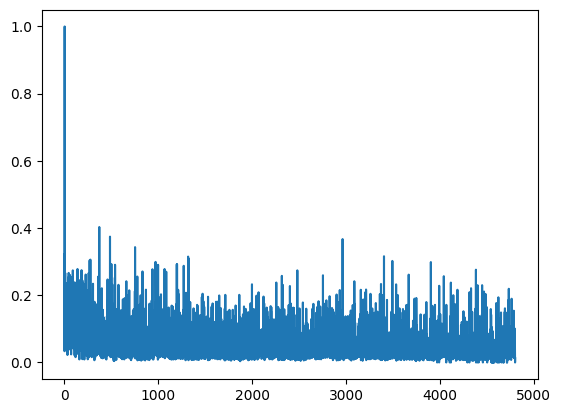

In [62]:
# currently the array is 1 x N, make it just a 1-D array
scores = score.flatten()
plt.plot(scores)

In [64]:
# now sort the index of movies according 
(-scores).argsort()

array([   4,  373,  487, ..., 4413, 4581, 4458], dtype=int64)

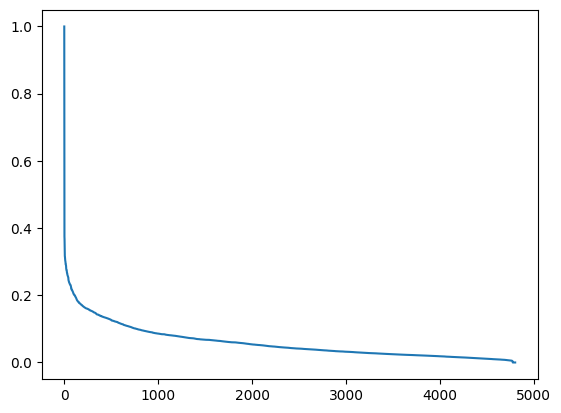

In [65]:
plt.plot(scores[(-scores).argsort()]);

In [87]:
# get top 5 matches
# exclude self (similarity between query and itself yields max score)
recommended_idx = (-scores).argsort()[1:5]
recommended_idx

array([ 373,  487, 2964,  754], dtype=int64)

In [69]:
recomended_name=df.title.iloc[recommended_idx]
recomended_name

373           Mission to Mars
487                Red Planet
2964    The Last Days on Mars
754                 Planet 51
0                      Avatar
Name: title, dtype: object

In [85]:
# now creating the function to give the name of 5 movies based on given title of the movies
def recommended(title):
    # getting the row of the dataframe
    idx=moive2index[title]
    if type(idx)==pd.Series:
        idx=idx.iloc[0]

# now calculating the pairwise similarity of the movies
    query=X[idx]
    score=cosine_similarity(query,X)
    # to make 1-n array to 1D array
    scores=score.flatten()
    # get top 5 matches
# exclude self (similarity between query and itself yields max score)
    recommended_idx = (-scores).argsort()[1:10]

    return df['title'].iloc[recommended_idx]
       

In [89]:
print(recommended('The Conjuring'))

2445                   The Apparition
2306            The Amityville Horror
2391                       Red Lights
4266    House at the End of the Drive
3583                Our Idiot Brother
4137                 Grave Encounters
1236                  Bless the Child
3270                      Howards End
2302                  Won't Back Down
Name: title, dtype: object
